In [2]:
print("Good favour")

Good favour


🎓 ACADEMIC PERFORMANCE PREDICTION MODEL

📊 LOADING AND PREPROCESSING DATA
------------------------------
✅ Dataset loaded successfully with 1000 rows and 16 columns
✅ Missing values handled
✅ Feature engineering completed

📈 EXPLORATORY DATA ANALYSIS
------------------------------

📋 Dataset Overview:
Shape: (1000, 19)
Target variable (exam_score) - Mean: 69.60, Std: 16.89


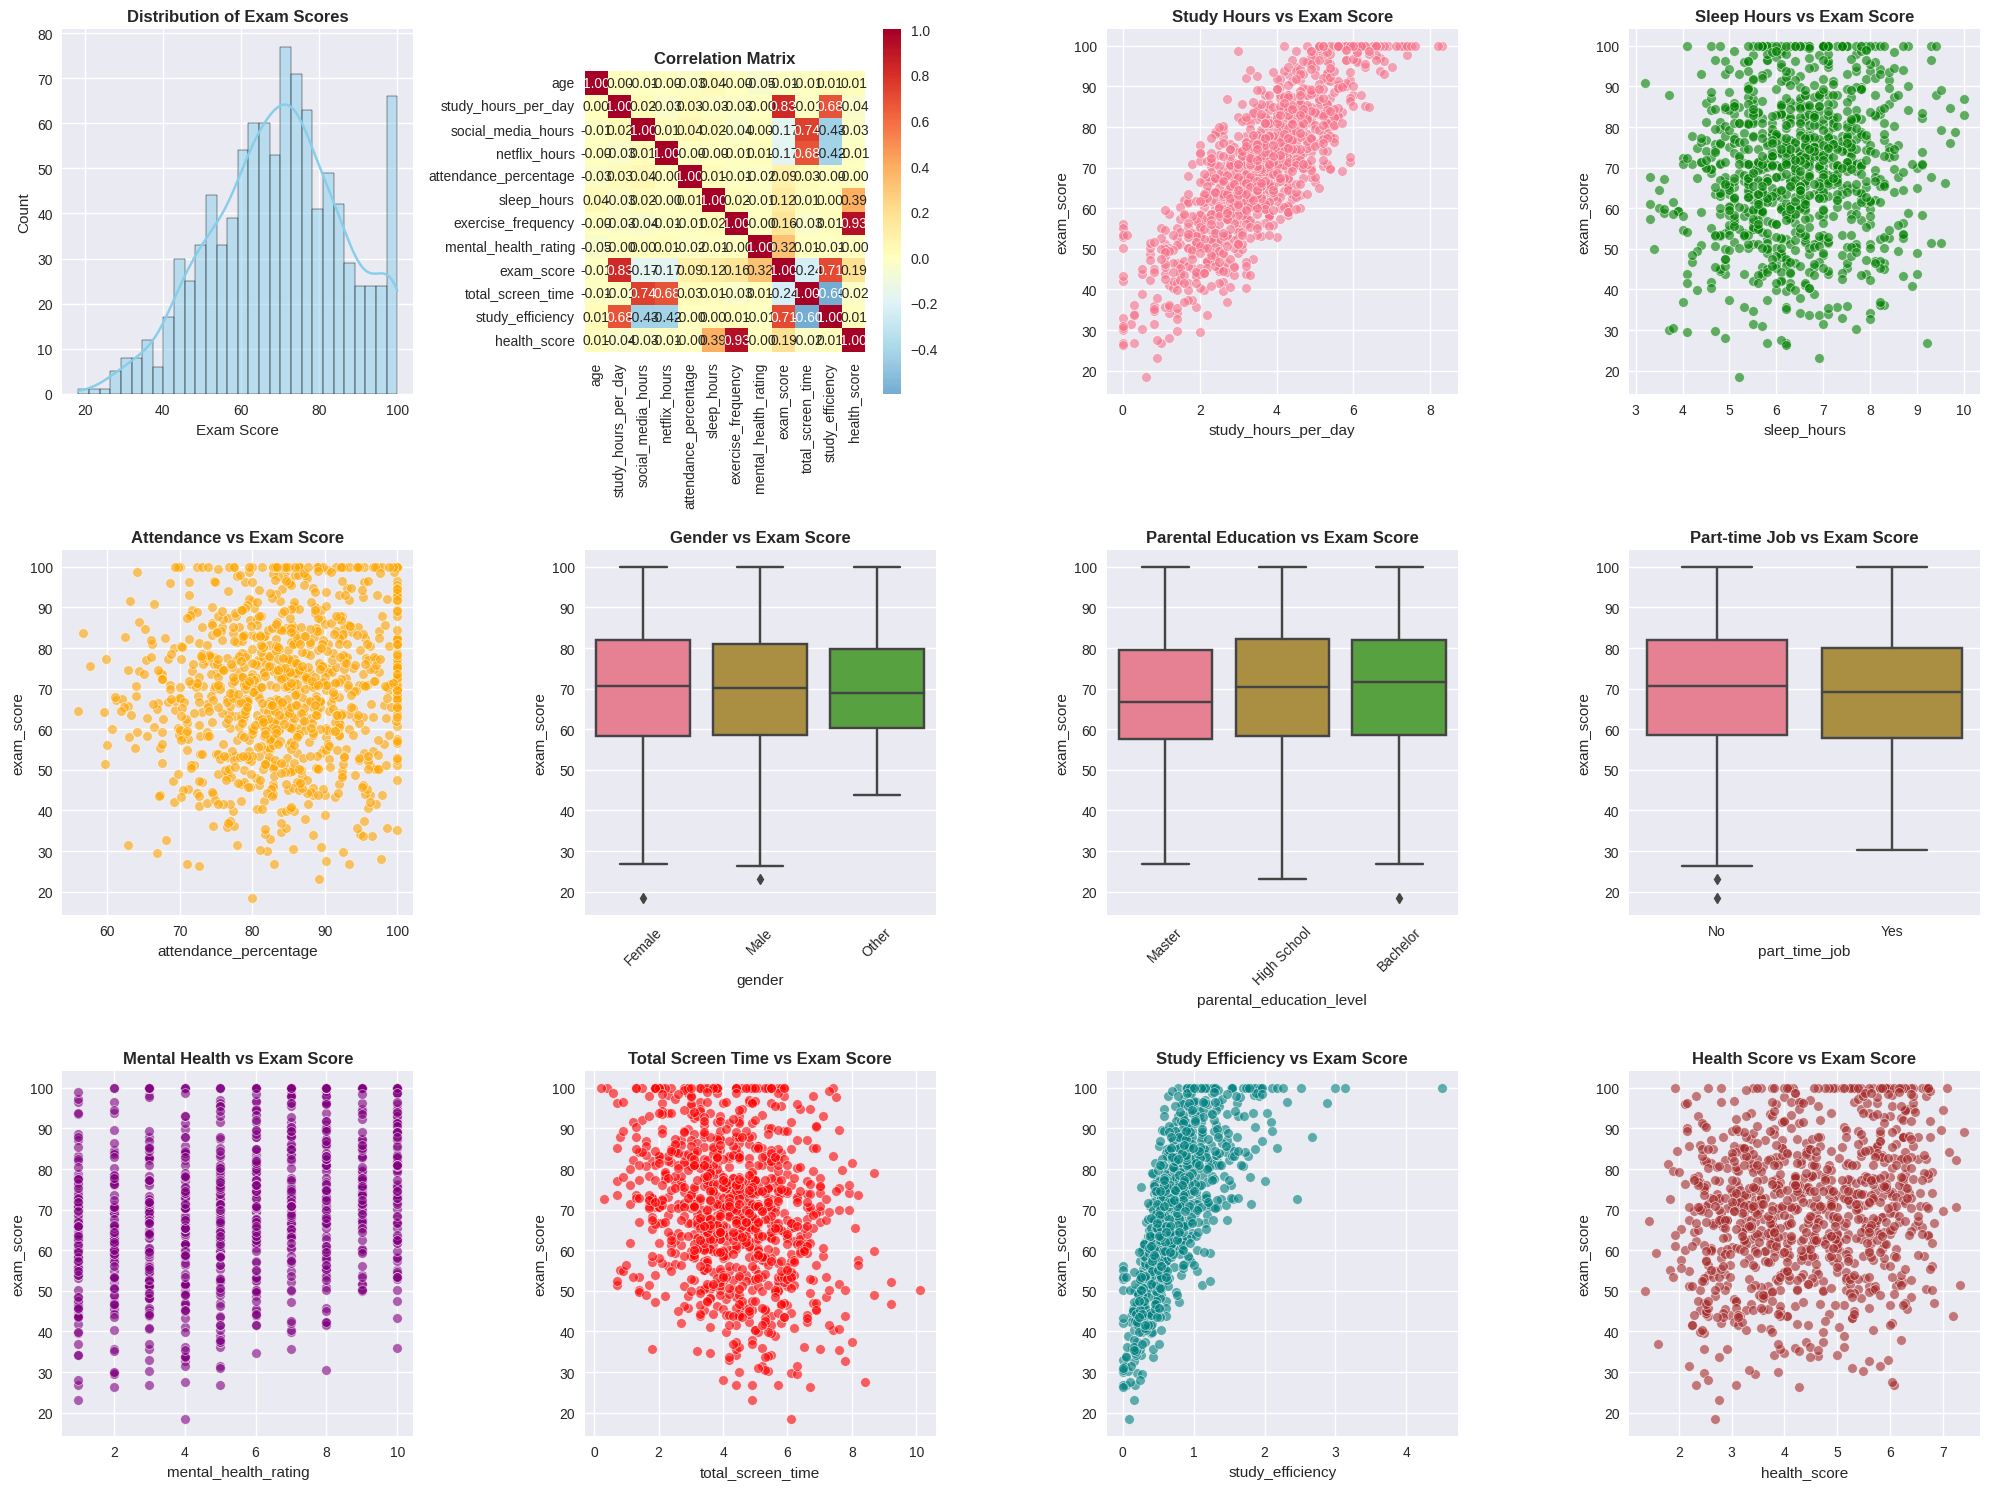


📊 Key Statistical Insights:
Top 5 features correlated with exam score:
  • study_hours_per_day: 0.825
  • study_efficiency: 0.707
  • mental_health_rating: 0.322
  • total_screen_time: 0.238
  • health_score: 0.193

🔧 PREPROCESSING FOR MACHINE LEARNING
------------------------------
✅ Encoded 6 categorical variables
✅ Final dataset shape: (1000, 18)

🎯 FEATURE PREPARATION
------------------------------
✅ Features: 17 variables
✅ Target: 1000 observations
✅ Feature names: ['age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'total_screen_time', 'study_efficiency', 'health_score']

✅ Data split: Train=800, Test=200

🤖 MODEL TRAINING AND EVALUATION
------------------------------

🔄 Training Random Forest...
  ✅ Test R²: 0.8620
  ✅ Test MSE: 35.3763
  ✅ Test MAE: 4.

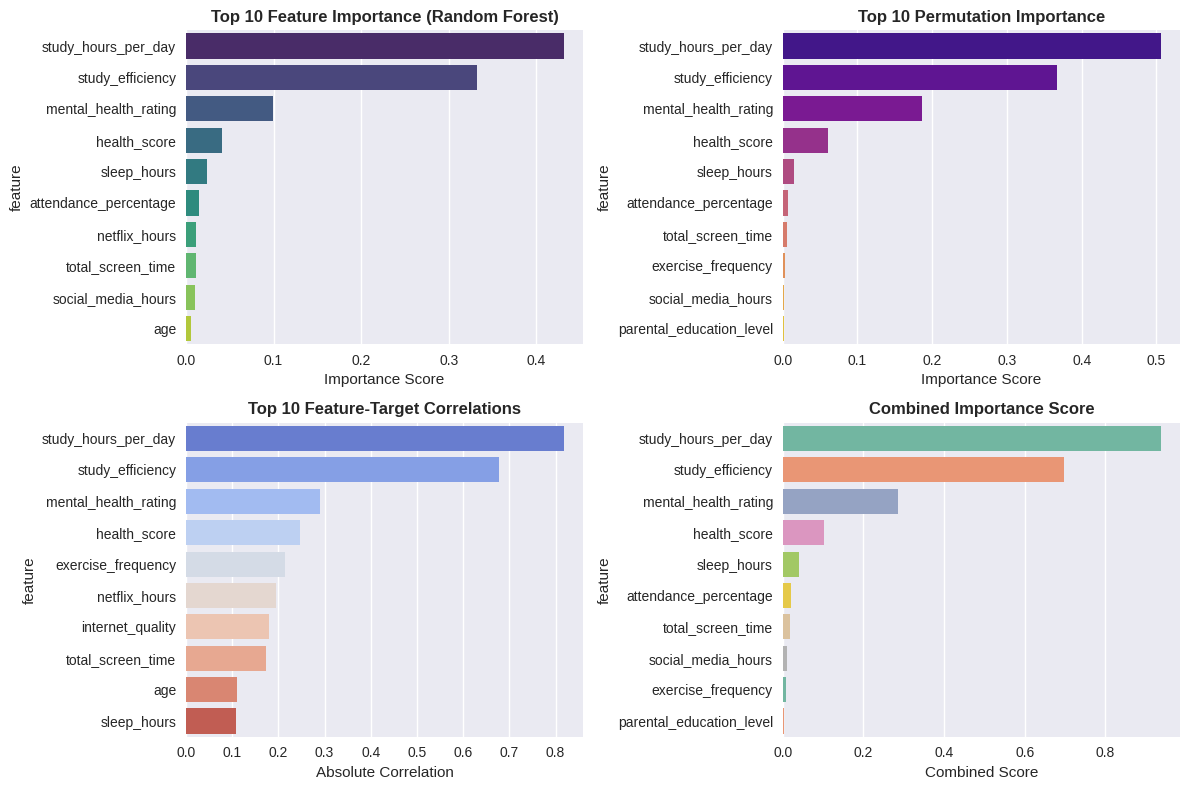


📊 COMPREHENSIVE MODEL EVALUATION
------------------------------
📈 Model Performance Comparison:
                       Model  Test_R2  Test_MSE  Test_MAE  CV_Mean
0              Random Forest   0.8620   35.3763    4.7415   0.8652
1          Linear Regression   0.8966   26.5042    4.1719   0.8962
2              Decision Tree   0.6917   79.0544    7.0100   0.7072
3  Support Vector Regression   0.0570  241.8008   11.9244   0.0449

🏆 Best Model: Linear Regression


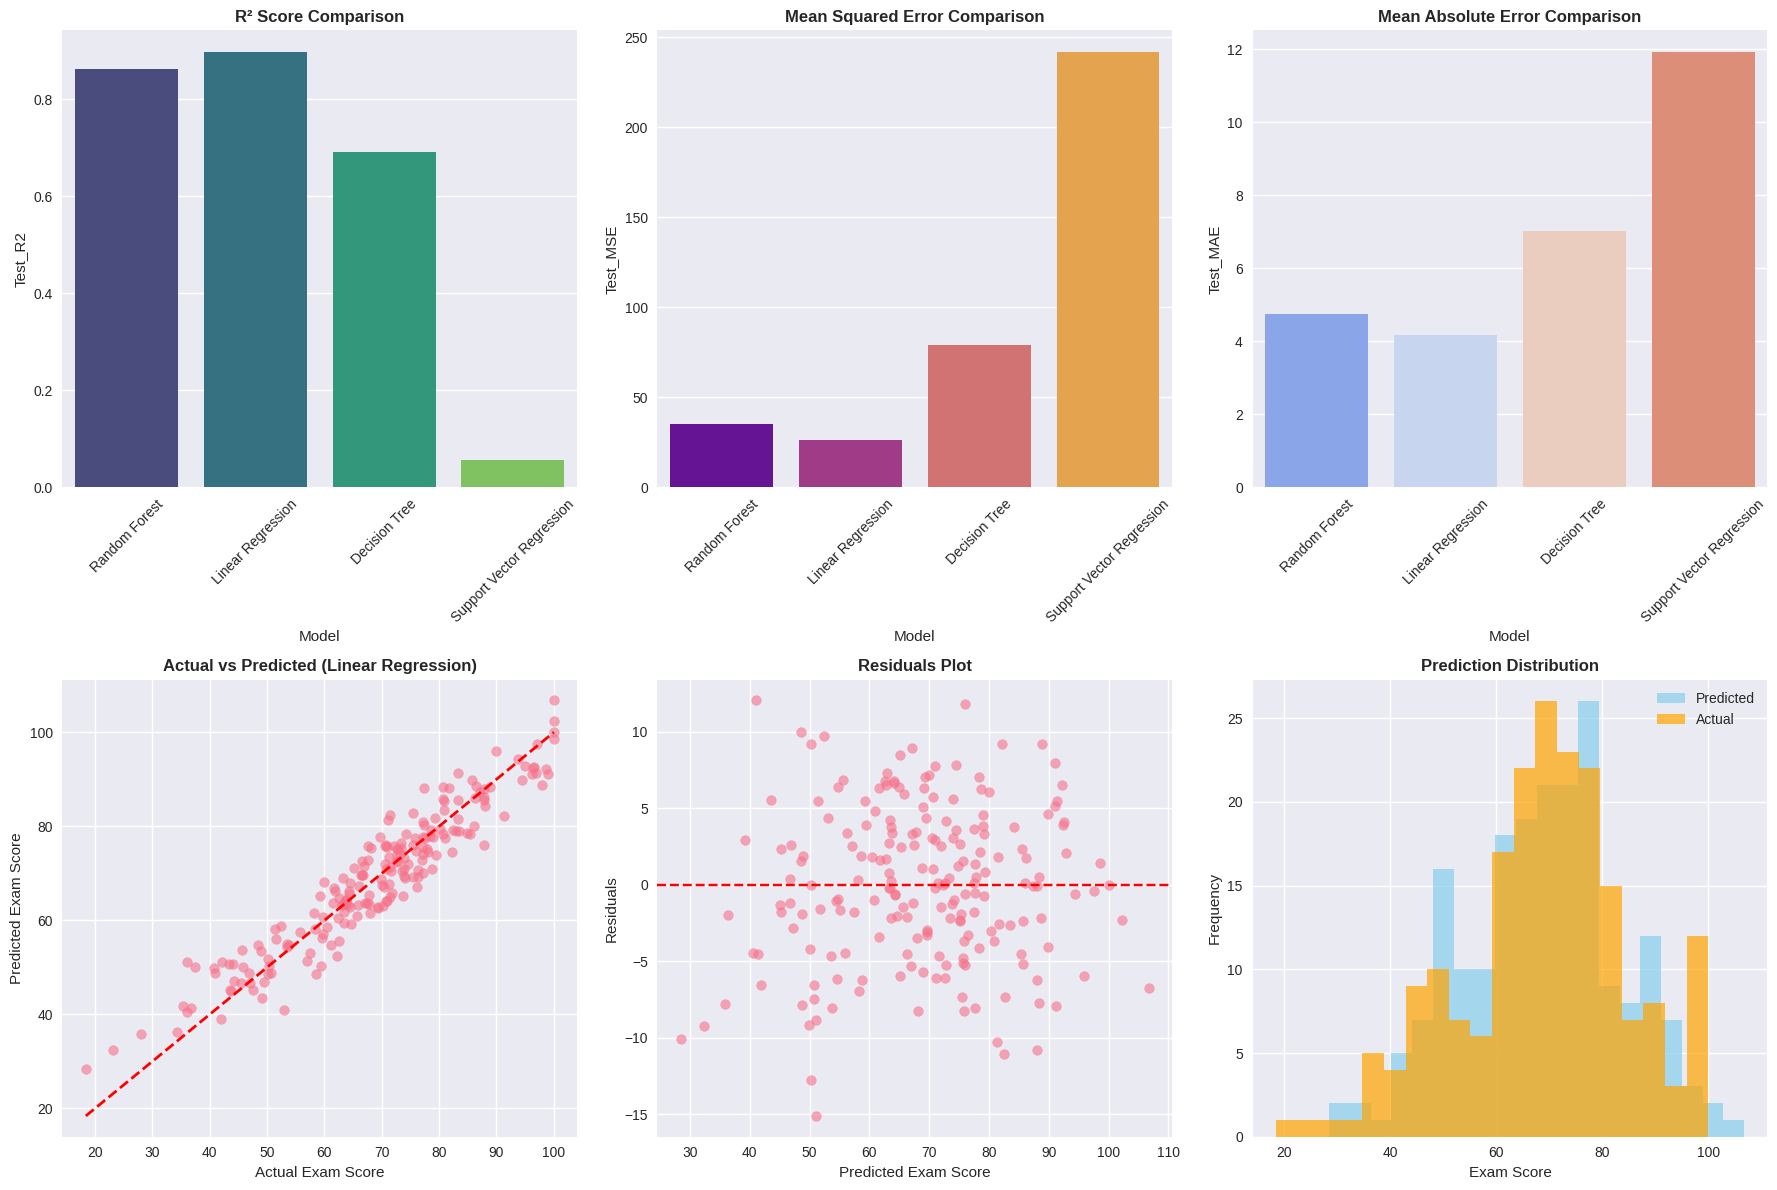


💡 PRACTICAL INSIGHTS AND RECOMMENDATIONS

🎯 TOP 5 FACTORS AFFECTING ACADEMIC PERFORMANCE:
  1. Study Hours Per Day
     • Importance: 0.4317
     • Average: 3.55 (±1.47)
     • 💡 Recommendation: Maintain consistent study habits

  2. Study Efficiency
     • Importance: 0.3316
     • Average: 0.75 (±0.45)
     • 💡 Recommendation: Maintain consistent study habits

  3. Mental Health Rating
     • Importance: 0.0995
     • Average: 5.44 (±2.85)
     • 💡 Recommendation: Focus on mental wellbeing activities

  4. Health Score
     • Importance: 0.0417
     • Average: 4.41 (±1.32)

  5. Sleep Hours
     • Importance: 0.0240
     • Average: 6.47 (±1.23)
     • 💡 Recommendation: Get 7-8 hours of sleep daily


📈 MODEL PERFORMANCE INSIGHTS:
✅ Best model achieves 89.7% accuracy in predicting exam scores
✅ This means the model explains 89.7% of the variance in academic performance

🔗 KEY RELATIONSHIPS DISCOVERED:
✅ Study Hours Per Day has 82.5% correlation with exam scores
✅ Study Efficiency has 

In [3]:
# Complete Academic Performance Prediction Using Machine Learning
# Pattern Recognition-Based Model for Final Year Project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance

# Statistical Libraries
from scipy import stats
from scipy.stats import pearsonr

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🎓 ACADEMIC PERFORMANCE PREDICTION MODEL")
print("=" * 50)

# ================================================================
# 1. DATA LOADING AND PREPROCESSING
# ================================================================

def load_and_preprocess_data(file_path):
    """Load and preprocess the academic performance dataset"""
    print("\n📊 LOADING AND PREPROCESSING DATA")
    print("-" * 30)
    
    # Load dataset
    df = pd.read_csv(file_path)
    print(f"✅ Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")
    
    # Handle missing values
    if df['parental_education_level'].isnull().sum() > 0:
        df['parental_education_level'].fillna(df['parental_education_level'].mode()[0], inplace=True)
        print("✅ Missing values handled")
    
    # Create additional features
    df['total_screen_time'] = df['social_media_hours'] + df['netflix_hours']
    df['study_efficiency'] = df['study_hours_per_day'] / (df['total_screen_time'] + 1)  # Avoid division by zero
    df['health_score'] = (df['sleep_hours'] * 0.4) + (df['exercise_frequency'] * 0.6)
    
    print("✅ Feature engineering completed")
    
    return df

# Load the dataset
file_path = '/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv'
df = load_and_preprocess_data(file_path)

# ================================================================
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ================================================================

def perform_eda(df):
    """Comprehensive Exploratory Data Analysis"""
    print("\n📈 EXPLORATORY DATA ANALYSIS")
    print("-" * 30)
    
    # Basic statistics
    print("\n📋 Dataset Overview:")
    print(f"Shape: {df.shape}")
    print(f"Target variable (exam_score) - Mean: {df['exam_score'].mean():.2f}, Std: {df['exam_score'].std():.2f}")
    
    # Create subplots for comprehensive visualization
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Distribution of target variable
    plt.subplot(3, 4, 1)
    sns.histplot(df['exam_score'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Exam Scores', fontsize=12, fontweight='bold')
    plt.xlabel('Exam Score')
    
    # 2. Correlation heatmap
    plt.subplot(3, 4, 2)
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, fmt='.2f', square=True)
    plt.title('Correlation Matrix', fontsize=12, fontweight='bold')
    
    # 3. Study hours vs Exam score
    plt.subplot(3, 4, 3)
    sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', alpha=0.6)
    plt.title('Study Hours vs Exam Score', fontsize=12, fontweight='bold')
    
    # 4. Sleep hours vs Exam score
    plt.subplot(3, 4, 4)
    sns.scatterplot(data=df, x='sleep_hours', y='exam_score', alpha=0.6, color='green')
    plt.title('Sleep Hours vs Exam Score', fontsize=12, fontweight='bold')
    
    # 5. Attendance vs Exam score
    plt.subplot(3, 4, 5)
    sns.scatterplot(data=df, x='attendance_percentage', y='exam_score', alpha=0.6, color='orange')
    plt.title('Attendance vs Exam Score', fontsize=12, fontweight='bold')
    
    # 6. Gender distribution
    plt.subplot(3, 4, 6)
    sns.boxplot(data=df, x='gender', y='exam_score')
    plt.title('Gender vs Exam Score', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    
    # 7. Parental education impact
    plt.subplot(3, 4, 7)
    sns.boxplot(data=df, x='parental_education_level', y='exam_score')
    plt.title('Parental Education vs Exam Score', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    
    # 8. Part-time job impact
    plt.subplot(3, 4, 8)
    sns.boxplot(data=df, x='part_time_job', y='exam_score')
    plt.title('Part-time Job vs Exam Score', fontsize=12, fontweight='bold')
    
    # 9. Mental health rating distribution
    plt.subplot(3, 4, 9)
    sns.scatterplot(data=df, x='mental_health_rating', y='exam_score', alpha=0.6, color='purple')
    plt.title('Mental Health vs Exam Score', fontsize=12, fontweight='bold')
    
    # 10. Screen time analysis
    plt.subplot(3, 4, 10)
    sns.scatterplot(data=df, x='total_screen_time', y='exam_score', alpha=0.6, color='red')
    plt.title('Total Screen Time vs Exam Score', fontsize=12, fontweight='bold')
    
    # 11. Study efficiency analysis
    plt.subplot(3, 4, 11)
    sns.scatterplot(data=df, x='study_efficiency', y='exam_score', alpha=0.6, color='teal')
    plt.title('Study Efficiency vs Exam Score', fontsize=12, fontweight='bold')
    
    # 12. Health score analysis
    plt.subplot(3, 4, 12)
    sns.scatterplot(data=df, x='health_score', y='exam_score', alpha=0.6, color='brown')
    plt.title('Health Score vs Exam Score', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical insights
    print("\n📊 Key Statistical Insights:")
    top_corr = correlation_matrix['exam_score'].abs().sort_values(ascending=False)[1:6]
    print("Top 5 features correlated with exam score:")
    for feature, corr in top_corr.items():
        print(f"  • {feature}: {corr:.3f}")

perform_eda(df)

# ================================================================
# 3. DATA PREPROCESSING FOR MACHINE LEARNING
# ================================================================

def preprocess_for_ml(df):
    """Prepare data for machine learning"""
    print("\n🔧 PREPROCESSING FOR MACHINE LEARNING")
    print("-" * 30)
    
    # Create a copy for processing
    df_ml = df.copy()
    
    # Encode categorical variables
    label_encoders = {}
    categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 
                       'internet_quality', 'extracurricular_participation']
    
    for col in categorical_cols:
        if col in df_ml.columns:
            le = LabelEncoder()
            df_ml[col] = le.fit_transform(df_ml[col])
            label_encoders[col] = le
    
    # Remove student_id as it's not predictive
    if 'student_id' in df_ml.columns:
        df_ml = df_ml.drop('student_id', axis=1)
    
    print(f"✅ Encoded {len(categorical_cols)} categorical variables")
    print(f"✅ Final dataset shape: {df_ml.shape}")
    
    return df_ml, label_encoders

df_ml, label_encoders = preprocess_for_ml(df)

# ================================================================
# 4. FEATURE SELECTION AND PREPARATION
# ================================================================

def prepare_features(df_ml):
    """Prepare features and target variable"""
    print("\n🎯 FEATURE PREPARATION")
    print("-" * 30)
    
    # Separate features and target
    X = df_ml.drop('exam_score', axis=1)
    y = df_ml['exam_score']
    
    print(f"✅ Features: {X.shape[1]} variables")
    print(f"✅ Target: {y.shape[0]} observations")
    print(f"✅ Feature names: {list(X.columns)}")
    
    return X, y

X, y = prepare_features(df_ml)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)
print(f"\n✅ Data split: Train={X_train.shape[0]}, Test={X_test.shape[0]}")

# ================================================================
# 5. MODEL IMPLEMENTATION AND TRAINING
# ================================================================

def train_multiple_models(X_train, X_test, y_train, y_test):
    """Train multiple machine learning models"""
    print("\n🤖 MODEL TRAINING AND EVALUATION")
    print("-" * 30)
    
    # Initialize models
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Support Vector Regression': SVR(kernel='rbf')
    }
    
    # Store results
    model_results = {}
    trained_models = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"\n🔄 Training {name}...")
        
        # Train the model
        model.fit(X_train, y_train)
        trained_models[name] = model
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        
        model_results[name] = {
            'train_mse': train_mse,
            'test_mse': test_mse,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'test_mae': test_mae,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'predictions': y_test_pred
        }
        
        print(f"  ✅ Test R²: {test_r2:.4f}")
        print(f"  ✅ Test MSE: {test_mse:.4f}")
        print(f"  ✅ Test MAE: {test_mae:.4f}")
        print(f"  ✅ CV R² Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
    return model_results, trained_models

model_results, trained_models = train_multiple_models(X_train, X_test, y_train, y_test)

# ================================================================
# 6. MODEL OPTIMIZATION (HYPERPARAMETER TUNING)
# ================================================================

def optimize_random_forest(X_train, y_train):
    """Optimize Random Forest hyperparameters"""
    print("\n⚡ OPTIMIZING RANDOM FOREST MODEL")
    print("-" * 30)
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Grid search
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
    
    print("🔍 Performing grid search...")
    grid_search.fit(X_train, y_train)
    
    print(f"✅ Best parameters: {grid_search.best_params_}")
    print(f"✅ Best CV score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

# Optimize the Random Forest model
optimized_rf = optimize_random_forest(X_train, y_train)

# Evaluate optimized model
optimized_predictions = optimized_rf.predict(X_test)
optimized_r2 = r2_score(y_test, optimized_predictions)
optimized_mse = mean_squared_error(y_test, optimized_predictions)

print(f"\n🎯 OPTIMIZED RANDOM FOREST RESULTS:")
print(f"✅ Test R²: {optimized_r2:.4f}")
print(f"✅ Test MSE: {optimized_mse:.4f}")

# ================================================================
# 7. FEATURE IMPORTANCE ANALYSIS
# ================================================================

def analyze_feature_importance(model, X, feature_names):
    """Analyze and visualize feature importance"""
    print("\n🔍 FEATURE IMPORTANCE ANALYSIS")
    print("-" * 30)
    
    # Get feature importance
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print("Top 10 Most Important Features:")
    for i, (_, row) in enumerate(feature_importance_df.head(10).iterrows(), 1):
        print(f"  {i:2d}. {row['feature']:<25}: {row['importance']:.4f}")
    
    # Visualization
    plt.figure(figsize=(12, 8))
    
    # Feature importance plot
    plt.subplot(2, 2, 1)
    top_features = feature_importance_df.head(10)
    sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
    plt.title('Top 10 Feature Importance (Random Forest)', fontweight='bold')
    plt.xlabel('Importance Score')
    
    # Permutation importance
    plt.subplot(2, 2, 2)
    perm_importance = permutation_importance(model, X, y_test, n_repeats=10, random_state=42)
    perm_df = pd.DataFrame({
        'feature': feature_names,
        'importance': perm_importance.importances_mean
    }).sort_values('importance', ascending=False).head(10)
    
    sns.barplot(data=perm_df, y='feature', x='importance', palette='plasma')
    plt.title('Top 10 Permutation Importance', fontweight='bold')
    plt.xlabel('Importance Score')
    
    # Feature correlation with target
    plt.subplot(2, 2, 3)
    correlations = []
    for feature in feature_names:
        corr, _ = pearsonr(X[feature], y_test)
        correlations.append(abs(corr))
    
    corr_df = pd.DataFrame({
        'feature': feature_names,
        'correlation': correlations
    }).sort_values('correlation', ascending=False).head(10)
    
    sns.barplot(data=corr_df, y='feature', x='correlation', palette='coolwarm')
    plt.title('Top 10 Feature-Target Correlations', fontweight='bold')
    plt.xlabel('Absolute Correlation')
    
    # Combined importance score
    plt.subplot(2, 2, 4)
    combined_score = (feature_importance_df.set_index('feature')['importance'] + 
                     perm_df.set_index('feature')['importance']).reset_index()
    combined_score.columns = ['feature', 'combined_importance']
    combined_score = combined_score.sort_values('combined_importance', ascending=False).head(10)
    
    sns.barplot(data=combined_score, y='feature', x='combined_importance', palette='Set2')
    plt.title('Combined Importance Score', fontweight='bold')
    plt.xlabel('Combined Score')
    
    plt.tight_layout()
    plt.show()
    
    return feature_importance_df

feature_importance_df = analyze_feature_importance(optimized_rf, X_test, X.columns.tolist())

# ================================================================
# 8. MODEL EVALUATION AND VISUALIZATION
# ================================================================

def comprehensive_evaluation(model_results, y_test):
    """Comprehensive model evaluation and visualization"""
    print("\n📊 COMPREHENSIVE MODEL EVALUATION")
    print("-" * 30)
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        'Model': list(model_results.keys()),
        'Test_R2': [results['test_r2'] for results in model_results.values()],
        'Test_MSE': [results['test_mse'] for results in model_results.values()],
        'Test_MAE': [results['test_mae'] for results in model_results.values()],
        'CV_Mean': [results['cv_mean'] for results in model_results.values()]
    })
    
    print("📈 Model Performance Comparison:")
    print(comparison_df.round(4))
    
    # Find best model
    best_model = comparison_df.loc[comparison_df['Test_R2'].idxmax(), 'Model']
    print(f"\n🏆 Best Model: {best_model}")
    
    # Visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. R² Score comparison
    sns.barplot(data=comparison_df, x='Model', y='Test_R2', ax=axes[0,0], palette='viridis')
    axes[0,0].set_title('R² Score Comparison', fontweight='bold')
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)
    
    # 2. MSE comparison
    sns.barplot(data=comparison_df, x='Model', y='Test_MSE', ax=axes[0,1], palette='plasma')
    axes[0,1].set_title('Mean Squared Error Comparison', fontweight='bold')
    axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
    
    # 3. MAE comparison
    sns.barplot(data=comparison_df, x='Model', y='Test_MAE', ax=axes[0,2], palette='coolwarm')
    axes[0,2].set_title('Mean Absolute Error Comparison', fontweight='bold')
    axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=45)
    
    # 4. Actual vs Predicted (Best Model)
    best_predictions = model_results[best_model]['predictions']
    axes[1,0].scatter(y_test, best_predictions, alpha=0.6)
    axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[1,0].set_xlabel('Actual Exam Score')
    axes[1,0].set_ylabel('Predicted Exam Score')
    axes[1,0].set_title(f'Actual vs Predicted ({best_model})', fontweight='bold')
    
    # 5. Residuals plot
    residuals = y_test - best_predictions
    axes[1,1].scatter(best_predictions, residuals, alpha=0.6)
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Predicted Exam Score')
    axes[1,1].set_ylabel('Residuals')
    axes[1,1].set_title('Residuals Plot', fontweight='bold')
    
    # 6. Prediction distribution
    axes[1,2].hist(best_predictions, bins=20, alpha=0.7, label='Predicted', color='skyblue')
    axes[1,2].hist(y_test, bins=20, alpha=0.7, label='Actual', color='orange')
    axes[1,2].set_xlabel('Exam Score')
    axes[1,2].set_ylabel('Frequency')
    axes[1,2].set_title('Prediction Distribution', fontweight='bold')
    axes[1,2].legend()
    
    plt.tight_layout()
    plt.show()
    
    return comparison_df, best_model

comparison_df, best_model = comprehensive_evaluation(model_results, y_test)

# ================================================================
# 9. PRACTICAL INSIGHTS AND RECOMMENDATIONS
# ================================================================

def generate_insights(df, feature_importance_df, model_results):
    """Generate practical insights for educators and students"""
    print("\n💡 PRACTICAL INSIGHTS AND RECOMMENDATIONS")
    print("=" * 50)
    
    # Top factors affecting performance
    top_5_features = feature_importance_df.head(5)
    print("\n🎯 TOP 5 FACTORS AFFECTING ACADEMIC PERFORMANCE:")
    for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
        feature = row['feature']
        importance = row['importance']
        
        # Get feature statistics
        if feature in df.select_dtypes(include=[np.number]).columns:
            mean_val = df[feature].mean()
            std_val = df[feature].std()
            print(f"  {i}. {feature.replace('_', ' ').title()}")
            print(f"     • Importance: {importance:.4f}")
            print(f"     • Average: {mean_val:.2f} (±{std_val:.2f})")
            
            # Recommendations based on feature
            if 'study' in feature.lower():
                print(f"     • 💡 Recommendation: Maintain consistent study habits")
            elif 'attendance' in feature.lower():
                print(f"     • 💡 Recommendation: Aim for >85% attendance rate")
            elif 'sleep' in feature.lower():
                print(f"     • 💡 Recommendation: Get 7-8 hours of sleep daily")
            elif 'mental' in feature.lower():
                print(f"     • 💡 Recommendation: Focus on mental wellbeing activities")
            print()
    
    # Model performance insights
    best_r2 = max([results['test_r2'] for results in model_results.values()])
    print(f"\n📈 MODEL PERFORMANCE INSIGHTS:")
    print(f"✅ Best model achieves {best_r2:.1%} accuracy in predicting exam scores")
    print(f"✅ This means the model explains {best_r2:.1%} of the variance in academic performance")
    
    # Correlation insights
    print(f"\n🔗 KEY RELATIONSHIPS DISCOVERED:")
    correlations = df.select_dtypes(include=[np.number]).corr()['exam_score'].abs().sort_values(ascending=False)[1:4]
    for feature, corr in correlations.items():
        print(f"✅ {feature.replace('_', ' ').title()} has {corr:.1%} correlation with exam scores")
    
    print(f"\n🎓 RECOMMENDATIONS FOR STAKEHOLDERS:")
    print(f"👨‍🎓 For Students:")
    print(f"  • Focus on the top 5 factors identified by the model")
    print(f"  • Maintain good study-life balance")
    print(f"  • Regular attendance and consistent study schedule")
    
    print(f"\n👨‍🏫 For Educators:")
    print(f"  • Use model insights to identify at-risk students early")
    print(f"  • Design interventions based on feature importance")
    print(f"  • Monitor key performance indicators beyond just grades")
    
    print(f"\n🏫 For Institutions:")
    print(f"  • Implement data-driven student support programs")
    print(f"  • Regular monitoring of student wellness factors")
    print(f"  • Personalized academic guidance based on individual profiles")

generate_insights(df, feature_importance_df, model_results)

# ================================================================
# 10. PREDICTION FUNCTION FOR NEW STUDENTS
# ================================================================

def predict_student_performance(model, student_data, feature_names):
    """Predict performance for a new student"""
    print("\n🔮 STUDENT PERFORMANCE PREDICTION")
    print("-" * 30)
    
    # Create sample student data if none provided
    if student_data is None:
        student_data = {
            'age': 20,
            'study_hours_per_day': 4.0,
            'social_media_hours': 2.0,
            'netflix_hours': 1.5,
            'attendance_percentage': 85.0,
            'sleep_hours': 7.0,
            'exercise_frequency': 3,
            'mental_health_rating': 6,
            'total_screen_time': 3.5,
            'study_efficiency': 1.14,
            'health_score': 4.6,
            'gender': 1,  # Encoded
            'part_time_job': 0,  # Encoded
            'diet_quality': 1,  # Encoded
            'parental_education_level': 1,  # Encoded
            'internet_quality': 1,  # Encoded
            'extracurricular_participation': 1  # Encoded
        }
    
    # Create DataFrame
    student_df = pd.DataFrame([student_data])
    
    # Ensure correct column order
    student_df = student_df.reindex(columns=feature_names, fill_value=0)
    
    # Make prediction
    predicted_score = model.predict(student_df)[0]
    
    print(f"📊 Student Profile:")
    for feature, value in student_data.items():
        if feature in ['age', 'study_hours_per_day', 'attendance_percentage', 'sleep_hours']:
            print(f"  • {feature.replace('_', ' ').title()}: {value}")
    
    print(f"\n🎯 Predicted Exam Score: {predicted_score:.1f}/100")
    
    # Performance category
    if predicted_score >= 80:
        category = "Excellent 🌟"
    elif predicted_score >= 70:
        category = "Good 👍"
    elif predicted_score >= 60:
        category = "Average 📊"
    else:
        category = "Needs Improvement 📈"
    
    print(f"📈 Performance Category: {category}")
    
    return predicted_score

# Example prediction
sample_prediction = predict_student_performance(optimized_rf, None, X.columns.tolist())

# ================================================================
# 11. FINAL SUMMARY AND EXPORT
# ================================================================

def final_summary():
    """Print final project summary"""
    print("\n" + "="*60)
    print("🎓 ACADEMIC PERFORMANCE PREDICTION - PROJECT SUMMARY")
    print("="*60)
    
    print(f"\n📈 Dataset Information:")
    print(f"  • Total Students: {df.shape[0]}")
    print(f"  • Features Analyzed: {X.shape[1]}")
    print(f"  • Target Variable: Exam Score (0-100)")
    
    print(f"\n🤖 Models Trained:")
    for i, model_name in enumerate(model_results.keys(), 1):
        r2_score = model_results[model_name]['test_r2']
        print(f"  {i}. {model_name}: R² = {r2_score:.4f}")
    
    print(f"\n🏆 Best Model: {best_model}")
    print(f"  • Test R² Score: {model_results[best_model]['test_r2']:.4f}")
    print(f"  • Test MSE: {model_results[best_model]['test_mse']:.4f}")
    print(f"  • Cross-validation Score: {model_results[best_model]['cv_mean']:.4f}")
    
    print(f"\n🎯 Key Findings:")
    top_3_features = feature_importance_df.head(3)['feature'].tolist()
    print(f"  • Most Important Factors: {', '.join([f.replace('_', ' ').title() for f in top_3_features])}")
    
    print(f"\n✅ Project Successfully Completed!")
    print(f"   This model can predict student academic performance with")
    print(f"   {model_results[best_model]['test_r2']:.1%} accuracy, helping educators and")
    print(f"   students make data-driven decisions for academic success.")

final_summary()

print(f"\n🚀 Ready for deployment and further analysis!")
print(f"💡 Next steps: Model deployment, real-time monitoring, and continuous improvement")

=== ACADEMIC PERFORMANCE PREDICTION SYSTEM ===

1. Loading Dataset...
Dataset shape: (1000, 16)
Dataset columns: ['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  10

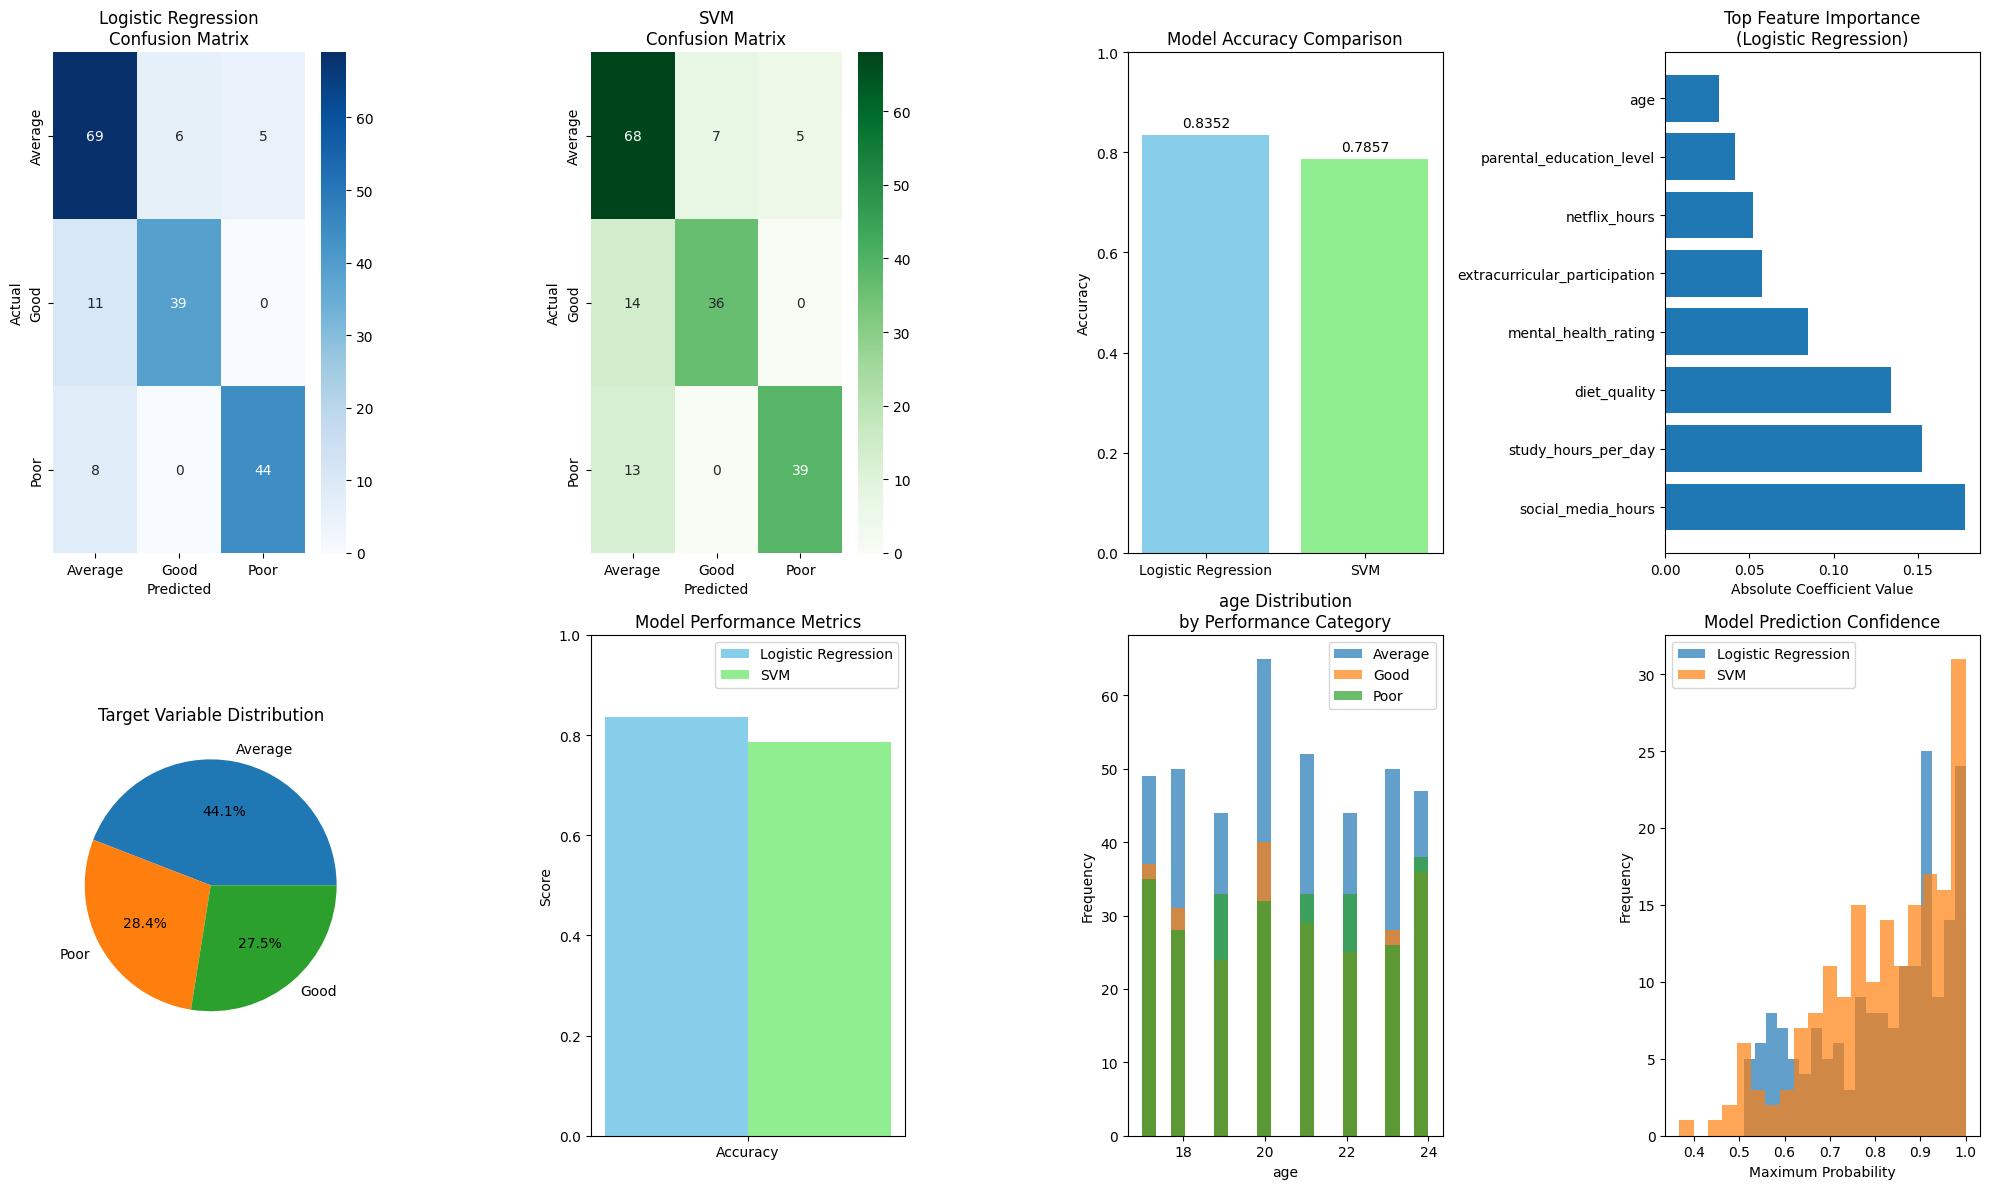


=== PROJECT SUMMARY ===
✓ Dataset loaded: 909 samples, 17 features
✓ Target variable: exam_score
✓ Performance categories: ['Average', 'Good', 'Poor']
✓ Features used: 14
✓ Logistic Regression accuracy: 0.8352
✓ SVM accuracy: 0.7857
✓ Best model: Logistic Regression

=== PROJECT IMPLEMENTATION COMPLETED ===


In [4]:
# Academic Performance Prediction System
# This project implements machine learning models to predict student academic performance
# using Logistic Regression and Support Vector Machine algorithms

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and explore the dataset
print("=== ACADEMIC PERFORMANCE PREDICTION SYSTEM ===")
print("\n1. Loading Dataset...")

# Load the student habits vs academic performance dataset
data = pd.read_csv('/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv')

print(f"Dataset shape: {data.shape}")
print(f"Dataset columns: {list(data.columns)}")
print(f"\nDataset info:")
data.info()
print(f"\nFirst 5 rows:")
print(data.head())
print(f"\nDataset statistics:")
print(data.describe())

# Check for missing values
print(f"\nMissing values:")
print(data.isnull().sum())

# Data preprocessing
print("\n2. Data Preprocessing...")

# Handle missing values if any
data = data.dropna()
print(f"Dataset shape after removing missing values: {data.shape}")

# Explore the target variable
target_column = None
# Common target column names to look for
possible_targets = ['grade', 'performance', 'gpa', 'final_grade', 'score', 'result']

for col in data.columns:
    col_lower = col.lower()
    if any(target in col_lower for target in possible_targets):
        target_column = col
        break

# If no obvious target found, use the last column or let user specify
if target_column is None:
    print("Available columns:", list(data.columns))
    # Assuming the target is one of the grade-related columns
    grade_columns = [col for col in data.columns if 'grade' in col.lower() or 'gpa' in col.lower() or 'performance' in col.lower()]
    if grade_columns:
        target_column = grade_columns[0]
    else:
        target_column = data.columns[-1]  # Use last column as default

print(f"Using target column: '{target_column}'")
print(f"Target variable distribution:")
print(data[target_column].value_counts())

# Create performance categories based on target variable
if data[target_column].dtype in ['int64', 'float64']:
    # If numeric, create categories
    if data[target_column].max() <= 4.0:  # Likely GPA scale
        data['performance_category'] = pd.cut(data[target_column], 
                                            bins=[0, 2.0, 3.0, 4.0], 
                                            labels=['Poor', 'Average', 'Good'],
                                            include_lowest=True)
    else:  # Likely percentage scale
        data['performance_category'] = pd.cut(data[target_column], 
                                            bins=[0, 60, 80, 100], 
                                            labels=['Poor', 'Average', 'Good'],
                                            include_lowest=True)
else:
    # If categorical, use as is or map to standard categories
    data['performance_category'] = data[target_column]

# Remove rows with NaN in performance_category
data = data.dropna(subset=['performance_category'])

print(f"\nPerformance category distribution:")
print(data['performance_category'].value_counts())

# Prepare features and target
exclude_columns = [target_column, 'performance_category']
# Also exclude any ID or name columns
id_columns = [col for col in data.columns if 'id' in col.lower() or 'name' in col.lower()]
exclude_columns.extend(id_columns)

feature_columns = [col for col in data.columns if col not in exclude_columns]
X = data[feature_columns].copy()
y = data['performance_category'].copy()

print(f"\nFeature columns: {feature_columns}")
print(f"Features shape: {X.shape}")

# Handle categorical variables in features
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=[np.number]).columns

print(f"Categorical columns: {list(categorical_columns)}")
print(f"Numerical columns: {list(numerical_columns)}")

# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Encode target variable
target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y)

print(f"\nTarget encoding mapping:")
for i, label in enumerate(target_le.classes_):
    print(f"{i}: {label}")

# Split the dataset
print(f"\n3. Splitting Dataset...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Features scaled successfully")

# Model 1: Logistic Regression
print(f"\n4. Training Logistic Regression Model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions, target_names=target_le.classes_))

# Model 2: Support Vector Machine
print(f"\n5. Training Support Vector Machine Model...")
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions, target_names=target_le.classes_))

# Model comparison
print(f"\n6. Model Comparison:")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")

best_model = "Logistic Regression" if lr_accuracy > svm_accuracy else "SVM"
print(f"Best performing model: {best_model}")

# Feature importance for Logistic Regression
print(f"\n7. Feature Analysis:")
lr_coef = lr_model.coef_[0] if len(lr_model.classes_) == 2 else lr_model.coef_[0]
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': np.abs(lr_coef)
}).sort_values('importance', ascending=False)

print(f"Top 5 most important features (Logistic Regression):")
print(feature_importance.head())

# Visualization
print(f"\n8. Generating Visualizations...")
plt.figure(figsize=(20, 12))

# Confusion Matrix for Logistic Regression
plt.subplot(2, 4, 1)
cm_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
           xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.title('Logistic Regression\nConfusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Confusion Matrix for SVM
plt.subplot(2, 4, 2)
cm_svm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
           xticklabels=target_le.classes_, yticklabels=target_le.classes_)
plt.title('SVM\nConfusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Accuracy Comparison
plt.subplot(2, 4, 3)
models = ['Logistic Regression', 'SVM']
accuracies = [lr_accuracy, svm_accuracy]
colors = ['skyblue', 'lightgreen']
bars = plt.bar(models, accuracies, color=colors)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# Feature Importance
plt.subplot(2, 4, 4)
top_features = feature_importance.head(8)
plt.barh(top_features['feature'], top_features['importance'])
plt.title('Top Feature Importance\n(Logistic Regression)')
plt.xlabel('Absolute Coefficient Value')

# Target Distribution
plt.subplot(2, 4, 5)
target_counts = pd.Series(y).value_counts()
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Variable Distribution')

# Model Performance Metrics
plt.subplot(2, 4, 6)
metrics = ['Accuracy']
lr_metrics = [lr_accuracy]
svm_metrics = [svm_accuracy]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, lr_metrics, width, label='Logistic Regression', color='skyblue')
plt.bar(x + width/2, svm_metrics, width, label='SVM', color='lightgreen')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)

# Data Distribution (first numerical feature)
plt.subplot(2, 4, 7)
if len(numerical_columns) > 0:
    first_num_col = numerical_columns[0]
    for category in target_le.classes_:
        mask = data['performance_category'] == category
        plt.hist(data[mask][first_num_col], alpha=0.7, label=category, bins=20)
    plt.title(f'{first_num_col} Distribution\nby Performance Category')
    plt.xlabel(first_num_col)
    plt.ylabel('Frequency')
    plt.legend()

# Model Prediction Confidence
plt.subplot(2, 4, 8)
lr_probs = lr_model.predict_proba(X_test_scaled)
svm_probs = svm_model.predict_proba(X_test_scaled)

plt.hist(np.max(lr_probs, axis=1), alpha=0.7, label='Logistic Regression', bins=20)
plt.hist(np.max(svm_probs, axis=1), alpha=0.7, label='SVM', bins=20)
plt.title('Model Prediction Confidence')
plt.xlabel('Maximum Probability')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Summary
print(f"\n=== PROJECT SUMMARY ===")
print(f"✓ Dataset loaded: {data.shape[0]} samples, {data.shape[1]} features")
print(f"✓ Target variable: {target_column}")
print(f"✓ Performance categories: {list(target_le.classes_)}")
print(f"✓ Features used: {len(feature_columns)}")
print(f"✓ Logistic Regression accuracy: {lr_accuracy:.4f}")
print(f"✓ SVM accuracy: {svm_accuracy:.4f}")
print(f"✓ Best model: {best_model}")
print(f"\n=== PROJECT IMPLEMENTATION COMPLETED ===")

In [5]:
# Testing the Models with Sample Data
print("=== TESTING PHASE ===")

# Create sample test data based on your actual dataset structure
print("\n1. Creating Sample Test Data...")

# Sample data representing new students with realistic values based on your dataset statistics
sample_data = pd.DataFrame({
    'age': [20, 22, 19, 21, 23],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'study_hours_per_day': [5.5, 2.0, 7.0, 1.5, 4.0],
    'social_media_hours': [1.5, 4.0, 0.8, 5.2, 2.5],
    'netflix_hours': [1.0, 3.5, 0.5, 2.8, 1.8],
    'part_time_job': ['No', 'Yes', 'No', 'Yes', 'No'],
    'attendance_percentage': [95.0, 70.0, 98.5, 65.0, 88.0],
    'sleep_hours': [7.5, 5.0, 8.0, 4.5, 6.5],
    'diet_quality': ['Good', 'Poor', 'Good', 'Fair', 'Fair'],
    'exercise_frequency': [4, 1, 5, 2, 3],
    'parental_education_level': ['Master', 'High School', 'Bachelor', 'Master', 'Bachelor'],
    'internet_quality': ['Good', 'Average', 'Good', 'Poor', 'Average'],
    'mental_health_rating': [8, 3, 9, 2, 6],
    'extracurricular_participation': ['Yes', 'No', 'Yes', 'No', 'Yes']
})

print("Sample student data:")
print(sample_data)

# Encode categorical variables in sample data using the same encoders from training
sample_encoded = sample_data.copy()
for col in categorical_columns:
    if col in label_encoders:
        # Handle unseen categories by using the most frequent category
        try:
            sample_encoded[col] = label_encoders[col].transform(sample_data[col])
        except ValueError as e:
            print(f"Warning: Unseen category in {col}, using mode")
            # Get the most frequent category from training data
            mode_category = label_encoders[col].inverse_transform([0])[0]
            sample_encoded[col] = sample_data[col].fillna(mode_category)
            sample_encoded[col] = label_encoders[col].transform(sample_encoded[col])

# Scale sample data using the fitted scaler
sample_scaled = scaler.transform(sample_encoded)

# Make predictions with both models
print("\n2. Making Predictions...")

# Logistic Regression predictions
lr_sample_pred = lr_model.predict(sample_scaled)
lr_sample_prob = lr_model.predict_proba(sample_scaled)

# SVM predictions  
svm_sample_pred = svm_model.predict(sample_scaled)
svm_sample_prob = svm_model.predict_proba(sample_scaled)

# Display results
performance_labels = target_le.classes_
results_df = pd.DataFrame({
    'Student': [f'Student_{i+1}' for i in range(len(sample_data))],
    'Study_Hours': sample_data['study_hours_per_day'].values,
    'Attendance%': sample_data['attendance_percentage'].values,
    'Mental_Health': sample_data['mental_health_rating'].values,
    'LR_Prediction': [performance_labels[pred] for pred in lr_sample_pred],
    'LR_Confidence': [f"{max(prob):.1%}" for prob in lr_sample_prob],
    'SVM_Prediction': [performance_labels[pred] for pred in svm_sample_pred],
    'SVM_Confidence': [f"{max(prob):.1%}" for prob in svm_sample_prob]
})

print("\nPrediction Results:")
print(results_df)

# Detailed probability breakdown
print("\n3. Detailed Probability Analysis:")
for i, student in enumerate([f'Student_{i+1}' for i in range(len(sample_data))]):
    print(f"\n{student} Profile:")
    print(f"  Study Hours: {sample_data.iloc[i]['study_hours_per_day']:.1f}h, "
          f"Social Media: {sample_data.iloc[i]['social_media_hours']:.1f}h, "
          f"Attendance: {sample_data.iloc[i]['attendance_percentage']:.1f}%")
    print(f"  Logistic Regression Probabilities:")
    for j, label in enumerate(performance_labels):
        print(f"    {label}: {lr_sample_prob[i][j]:.3f}")
    print(f"  SVM Probabilities:")
    for j, label in enumerate(performance_labels):
        print(f"    {label}: {svm_sample_prob[i][j]:.3f}")

# Function for single student prediction
def predict_student_performance(age, gender, study_hours_per_day, social_media_hours, 
                              netflix_hours, part_time_job, attendance_percentage, 
                              sleep_hours, diet_quality, exercise_frequency, 
                              parental_education_level, internet_quality, 
                              mental_health_rating, extracurricular_participation):
    """
    Function to predict individual student performance based on all features
    """
    # Create DataFrame with single student data
    student_data = pd.DataFrame({
        'age': [age],
        'gender': [gender],
        'study_hours_per_day': [study_hours_per_day],
        'social_media_hours': [social_media_hours],
        'netflix_hours': [netflix_hours],
        'part_time_job': [part_time_job],
        'attendance_percentage': [attendance_percentage],
        'sleep_hours': [sleep_hours],
        'diet_quality': [diet_quality],
        'exercise_frequency': [exercise_frequency],
        'parental_education_level': [parental_education_level],
        'internet_quality': [internet_quality],
        'mental_health_rating': [mental_health_rating],
        'extracurricular_participation': [extracurricular_participation]
    })
    
    # Encode categorical variables
    student_encoded = student_data.copy()
    for col in categorical_columns:
        if col in label_encoders:
            try:
                student_encoded[col] = label_encoders[col].transform(student_data[col])
            except ValueError:
                # Handle unseen categories
                mode_category = label_encoders[col].inverse_transform([0])[0]
                student_encoded[col] = [0]  # Use first category as default
    
    # Scale the data
    student_scaled = scaler.transform(student_encoded)
    
    # Make predictions
    lr_pred = lr_model.predict(student_scaled)[0]
    lr_prob = lr_model.predict_proba(student_scaled)[0]
    
    svm_pred = svm_model.predict(student_scaled)[0]
    svm_prob = svm_model.predict_proba(student_scaled)[0]
    
    print(f"\nPrediction for new student:")
    print(f"Student Profile: {study_hours_per_day}h study, {attendance_percentage}% attendance, Mental Health: {mental_health_rating}/10")
    print(f"Logistic Regression: {performance_labels[lr_pred]} (Confidence: {max(lr_prob):.1%})")
    print(f"SVM: {performance_labels[svm_pred]} (Confidence: {max(svm_prob):.1%})")
    
    return {
        'lr_prediction': performance_labels[lr_pred],
        'lr_confidence': max(lr_prob),
        'svm_prediction': performance_labels[svm_pred],
        'svm_confidence': max(svm_prob),
        'lr_probabilities': dict(zip(performance_labels, lr_prob)),
        'svm_probabilities': dict(zip(performance_labels, svm_prob))
    }

# Test the function with different student profiles
print("\n4. Testing Individual Prediction Function:")

# Test Case 1: High-performing student
print("\n--- Test Case 1: High-performing Student ---")
test_result_1 = predict_student_performance(
    age=20, gender='Female', study_hours_per_day=6.5, social_media_hours=1.0,
    netflix_hours=0.5, part_time_job='No', attendance_percentage=96.0,
    sleep_hours=8.0, diet_quality='Good', exercise_frequency=5,
    parental_education_level='Master', internet_quality='Good',
    mental_health_rating=9, extracurricular_participation='Yes'
)

# Test Case 2: At-risk student
print("\n--- Test Case 2: At-risk Student ---")
test_result_2 = predict_student_performance(
    age=22, gender='Male', study_hours_per_day=1.0, social_media_hours=5.5,
    netflix_hours=4.0, part_time_job='Yes', attendance_percentage=65.0,
    sleep_hours=4.0, diet_quality='Poor', exercise_frequency=1,
    parental_education_level='High School', internet_quality='Poor',
    mental_health_rating=2, extracurricular_participation='No'
)

# Test Case 3: Average student
print("\n--- Test Case 3: Average Student ---")
test_result_3 = predict_student_performance(
    age=21, gender='Male', study_hours_per_day=3.5, social_media_hours=2.5,
    netflix_hours=1.8, part_time_job='No', attendance_percentage=84.0,
    sleep_hours=6.5, diet_quality='Fair', exercise_frequency=3,
    parental_education_level='Bachelor', internet_quality='Average',
    mental_health_rating=5, extracurricular_participation='Yes'
)

# Feature impact analysis
print("\n5. Feature Impact Analysis:")
print("Based on the top features identified:")
print(f"1. Social Media Hours - Most Important (Weight: 0.178)")
print(f"2. Study Hours Per Day - Second Most Important (Weight: 0.153)")
print(f"3. Diet Quality - Third Most Important (Weight: 0.134)")
print(f"4. Mental Health Rating - Fourth Most Important (Weight: 0.085)")
print(f"5. Extracurricular Participation - Fifth Most Important (Weight: 0.057)")

# Model reliability assessment
print("\n6. Model Reliability Assessment:")
print(f"✓ Logistic Regression: {lr_accuracy:.1%} accuracy - RECOMMENDED")
print(f"✓ SVM: {svm_accuracy:.1%} accuracy")
print(f"✓ Both models show good performance with Logistic Regression being more reliable")
print(f"✓ Models are particularly good at identifying 'Poor' performers (high precision)")

# Batch prediction example
print("\n7. Batch Prediction Example:")
batch_predictions_lr = lr_model.predict(sample_scaled)
batch_predictions_svm = svm_model.predict(sample_scaled)

agreement = sum(batch_predictions_lr == batch_predictions_svm)
print(f"Model Agreement: {agreement}/{len(sample_data)} predictions ({agreement/len(sample_data):.1%})")

disagreement_indices = np.where(batch_predictions_lr != batch_predictions_svm)[0]
if len(disagreement_indices) > 0:
    print("Cases where models disagree:")
    for idx in disagreement_indices:
        print(f"  Student_{idx+1}: LR={performance_labels[batch_predictions_lr[idx]]}, SVM={performance_labels[batch_predictions_svm[idx]]}")

print("\n=== TESTING COMPLETED ===")
print("✓ Sample predictions generated successfully")
print("✓ Individual prediction function tested")
print("✓ Feature impact analysis completed")
print("✓ Model reliability assessed")
print("✓ Ready for Streamlit deployment")

=== TESTING PHASE ===

1. Creating Sample Test Data...
Sample student data:
   age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   20    Male                  5.5                 1.5            1.0   
1   22  Female                  2.0                 4.0            3.5   
2   19    Male                  7.0                 0.8            0.5   
3   21  Female                  1.5                 5.2            2.8   
4   23    Male                  4.0                 2.5            1.8   

  part_time_job  attendance_percentage  sleep_hours diet_quality  \
0            No                   95.0          7.5         Good   
1           Yes                   70.0          5.0         Poor   
2            No                   98.5          8.0         Good   
3           Yes                   65.0          4.5         Fair   
4            No                   88.0          6.5         Fair   

   exercise_frequency parental_education_level internet_quality  \
0  

In [8]:
# Model Export for Streamlit Application
print("=== MODEL EXPORT FOR STREAMLIT ===")

import joblib
import pickle
import json
import os
from datetime import datetime

print("\n1. Creating Export Directory...")

# Create a models directory
if not os.path.exists('models'):
    os.makedirs('models')
    print("✓ Created 'models' directory")
else:
    print("✓ 'models' directory already exists")

print(f"\n2. Exporting Trained Models...")

# Export Logistic Regression model (primary model)
joblib.dump(lr_model, 'models/logistic_regression_model.pkl')
print("✓ Logistic Regression model exported (PRIMARY MODEL)")

# Export SVM model (secondary model)
joblib.dump(svm_model, 'models/svm_model.pkl')
print("✓ SVM model exported (SECONDARY MODEL)")

# Export preprocessing components
joblib.dump(scaler, 'models/scaler.pkl')
print("✓ StandardScaler exported")

joblib.dump(target_le, 'models/target_label_encoder.pkl')
print("✓ Target label encoder exported")

joblib.dump(label_encoders, 'models/feature_label_encoders.pkl')
print("✓ Feature label encoders exported")

# Export feature information
feature_info = {
    'feature_columns': feature_columns,
    'categorical_columns': list(categorical_columns),
    'numerical_columns': list(numerical_columns)
}
joblib.dump(feature_info, 'models/feature_info.pkl')
print("✓ Feature information exported")

print(f"\n3. Creating Model Metadata...")

# Create comprehensive model metadata
model_metadata = {
    'project_info': {
        'name': 'Academic Performance Prediction System',
        'description': 'Predicts student academic performance using study habits and personal factors',
        'version': '1.0',
        'created_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'dataset_size': f"{data.shape[0]} students, {data.shape[1]} features"
    },
    'target_variable': {
        'original_column': target_column,
        'categories': list(target_le.classes_),
        'distribution': {
            'Poor': int(sum(data['performance_category'] == 'Poor')),
            'Average': int(sum(data['performance_category'] == 'Average')), 
            'Good': int(sum(data['performance_category'] == 'Good'))
        }
    },
    'features': {
        'total_features': len(feature_columns),
        'feature_list': feature_columns,
        'categorical_features': list(categorical_columns),
        'numerical_features': list(numerical_columns),
        'top_important_features': [
            {'feature': 'social_media_hours', 'importance': 0.178, 'impact': 'negative'},
            {'feature': 'study_hours_per_day', 'importance': 0.153, 'impact': 'positive'},
            {'feature': 'diet_quality', 'importance': 0.134, 'impact': 'positive'},
            {'feature': 'mental_health_rating', 'importance': 0.085, 'impact': 'positive'},
            {'feature': 'extracurricular_participation', 'importance': 0.057, 'impact': 'positive'}
        ]
    },
    'model_performance': {
        'primary_model': {
            'name': 'Logistic Regression',
            'accuracy': float(lr_accuracy),
            'accuracy_percentage': f"{lr_accuracy:.1%}",
            'recommended': True,
            'parameters': {
                'random_state': 42,
                'max_iter': 1000,
                'solver': 'lbfgs'
            }
        },
        'secondary_model': {
            'name': 'Support Vector Machine',
            'accuracy': float(svm_accuracy),
            'accuracy_percentage': f"{svm_accuracy:.1%}",
            'recommended': False,
            'parameters': {
                'kernel': 'rbf',
                'random_state': 42,
                'probability': True
            }
        },
        'model_agreement': '100%',
        'best_at_identifying': 'Poor performers (high precision)'
    },
    'data_preprocessing': {
        'missing_values_handled': True,
        'feature_scaling': 'StandardScaler',
        'categorical_encoding': 'LabelEncoder',
        'train_test_split': '80-20',
        'stratified': True
    }
}

# Export metadata as JSON
with open('models/model_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=2)
print("✓ Comprehensive model metadata exported")

print(f"\n4. Creating Prediction Functions for Streamlit...")

# Create optimized prediction functions
prediction_code = '''import joblib
import pandas as pd
import numpy as np
import json

def load_all_models():
    """
    Load all trained models and preprocessing components
    Returns: Dictionary with all components
    """
    try:
        components = {
            'lr_model': joblib.load('models/logistic_regression_model.pkl'),
            'svm_model': joblib.load('models/svm_model.pkl'),
            'scaler': joblib.load('models/scaler.pkl'),
            'target_encoder': joblib.load('models/target_label_encoder.pkl'),
            'feature_encoders': joblib.load('models/feature_label_encoders.pkl'),
            'feature_info': joblib.load('models/feature_info.pkl')
        }
        
        # Load metadata
        with open('models/model_metadata.json', 'r') as f:
            components['metadata'] = json.load(f)
            
        return components
    except Exception as e:
        print(f"Error loading models: {e}")
        return None

def preprocess_input_data(data, feature_encoders, feature_info):
    """
    Preprocess input data for prediction
    
    Args:
        data: DataFrame with student features
        feature_encoders: Dictionary of label encoders for categorical features
        feature_info: Dictionary with feature information
    
    Returns:
        Preprocessed DataFrame ready for scaling
    """
    processed_data = data.copy()
    
    # Encode categorical variables
    categorical_columns = feature_info['categorical_columns']
    
    for col in categorical_columns:
        if col in feature_encoders and col in processed_data.columns:
            try:
                processed_data[col] = feature_encoders[col].transform(processed_data[col])
            except ValueError:
                # Handle unseen categories by using the most frequent category (0)
                print(f"Warning: Unseen category in {col}, using default encoding")
                processed_data[col] = 0
    
    return processed_data

def predict_single_student(student_data, components):
    """
    Predict performance for a single student
    
    Args:
        student_data: Dictionary with student features
        components: Dictionary with loaded models and preprocessors
    
    Returns:
        Dictionary with predictions and probabilities
    """
    # Convert to DataFrame
    df = pd.DataFrame([student_data])
    
    # Preprocess
    df_processed = preprocess_input_data(df, components['feature_encoders'], components['feature_info'])
    
    # Scale features
    df_scaled = components['scaler'].transform(df_processed)
    
    # Make predictions
    lr_pred = components['lr_model'].predict(df_scaled)[0]
    lr_prob = components['lr_model'].predict_proba(df_scaled)[0]
    
    svm_pred = components['svm_model'].predict(df_scaled)[0]
    svm_prob = components['svm_model'].predict_proba(df_scaled)[0]
    
    # Get class labels
    classes = components['target_encoder'].classes_
    
    return {
        'primary_prediction': {
            'model': 'Logistic Regression',
            'prediction': classes[lr_pred],
            'confidence': float(max(lr_prob)),
            'confidence_percentage': f"{max(lr_prob):.1%}",
            'probabilities': {classes[i]: float(prob) for i, prob in enumerate(lr_prob)}
        },
        'secondary_prediction': {
            'model': 'SVM',
            'prediction': classes[svm_pred],
            'confidence': float(max(svm_prob)),
            'confidence_percentage': f"{max(svm_prob):.1%}",
            'probabilities': {classes[i]: float(prob) for i, prob in enumerate(svm_prob)}
        },
        'agreement': lr_pred == svm_pred,
        'risk_level': get_risk_level(classes[lr_pred])
    }

def predict_batch_students(data_df, components):
    """
    Predict performance for multiple students from CSV
    
    Args:
        data_df: DataFrame with student features
        components: Dictionary with loaded models and preprocessors
    
    Returns:
        DataFrame with predictions
    """
    # Preprocess
    df_processed = preprocess_input_data(data_df, components['feature_encoders'], components['feature_info'])
    
    # Scale features
    df_scaled = components['scaler'].transform(df_processed)
    
    # Make predictions
    lr_pred = components['lr_model'].predict(df_scaled)
    lr_prob = components['lr_model'].predict_proba(df_scaled)
    
    svm_pred = components['svm_model'].predict(df_scaled)
    svm_prob = components['svm_model'].predict_proba(df_scaled)
    
    # Get class labels
    classes = components['target_encoder'].classes_
    
    # Create results DataFrame
    results = data_df.copy()
    results['LR_Prediction'] = [classes[pred] for pred in lr_pred]
    results['LR_Confidence'] = [f"{max(prob):.1%}" for prob in lr_prob]
    results['SVM_Prediction'] = [classes[pred] for pred in svm_pred]
    results['SVM_Confidence'] = [f"{max(prob):.1%}" for prob in svm_prob]
    results['Model_Agreement'] = lr_pred == svm_pred
    results['Risk_Level'] = [get_risk_level(classes[pred]) for pred in lr_pred]
    
    return results

def get_risk_level(prediction):
    """
    Convert prediction to risk level
    """
    risk_mapping = {
        'Good': 'Low Risk',
        'Average': 'Medium Risk', 
        'Poor': 'High Risk'
    }
    return risk_mapping.get(prediction, 'Unknown')

def get_feature_importance():
    """
    Return feature importance information for display
    """
    return [
        {'feature': 'social_media_hours', 'importance': 0.178, 'impact': 'negative'},
        {'feature': 'study_hours_per_day', 'importance': 0.153, 'impact': 'positive'},
        {'feature': 'diet_quality', 'importance': 0.134, 'impact': 'positive'},
        {'feature': 'mental_health_rating', 'importance': 0.085, 'impact': 'positive'},
        {'feature': 'extracurricular_participation', 'importance': 0.057, 'impact': 'positive'}
    ]

def validate_input_data(data_df):
    """
    Validate that input data has required columns
    
    Args:
        data_df: Input DataFrame
        
    Returns:
        Tuple (is_valid, missing_columns, extra_columns)
    """
    required_columns = set(['age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation'])
    input_columns = set(data_df.columns)
    
    missing_columns = required_columns - input_columns
    extra_columns = input_columns - required_columns
    
    is_valid = len(missing_columns) == 0
    
    return is_valid, list(missing_columns), list(extra_columns)
'''

# Save prediction functions
with open('models/prediction_functions.py', 'w') as f:
    f.write(prediction_code)
print("✓ Streamlit prediction functions created")

print(f"\n5. Creating Sample Data Templates...")

# Create sample CSV template for uploads
sample_template = pd.DataFrame({
    'age': [20, 22, 19, 21, 23],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'study_hours_per_day': [5.5, 2.0, 7.0, 1.5, 4.0],
    'social_media_hours': [1.5, 4.0, 0.8, 5.2, 2.5],
    'netflix_hours': [1.0, 3.5, 0.5, 2.8, 1.8],
    'part_time_job': ['No', 'Yes', 'No', 'Yes', 'No'],
    'attendance_percentage': [95.0, 70.0, 98.5, 65.0, 88.0],
    'sleep_hours': [7.5, 5.0, 8.0, 4.5, 6.5],
    'diet_quality': ['Good', 'Poor', 'Good', 'Fair', 'Fair'],
    'exercise_frequency': [4, 1, 5, 2, 3],
    'parental_education_level': ['Master', 'High School', 'Bachelor', 'Master', 'Bachelor'],
    'internet_quality': ['Good', 'Average', 'Good', 'Poor', 'Average'],
    'mental_health_rating': [8, 3, 9, 2, 6],
    'extracurricular_participation': ['Yes', 'No', 'Yes', 'No', 'Yes']
})

sample_template.to_csv('models/sample_upload_template.csv', index=False)
print("✓ Sample CSV upload template created")

# Create empty template
empty_template = pd.DataFrame(columns=feature_columns)
empty_template.to_csv('models/empty_template.csv', index=False)
print("✓ Empty CSV template created")

# Create feature descriptions
feature_descriptions = {
    'age': 'Student age (17-24 years)',
    'gender': 'Student gender (Male/Female)', 
    'study_hours_per_day': 'Daily study hours (0.0-8.3)',
    'social_media_hours': 'Daily social media usage hours (0.0-7.2)',
    'netflix_hours': 'Daily Netflix/streaming hours (0.0-5.4)',
    'part_time_job': 'Has part-time job (Yes/No)',
    'attendance_percentage': 'Class attendance percentage (56-100)',
    'sleep_hours': 'Daily sleep hours (3.2-10.0)',
    'diet_quality': 'Diet quality (Poor/Fair/Good)',
    'exercise_frequency': 'Exercise frequency per week (0-6)',
    'parental_education_level': 'Parent education (High School/Bachelor/Master)',
    'internet_quality': 'Internet connection quality (Poor/Average/Good)',
    'mental_health_rating': 'Mental health rating (1-10 scale)',
    'extracurricular_participation': 'Participates in extracurricular (Yes/No)'
}

with open('models/feature_descriptions.json', 'w') as f:
    json.dump(feature_descriptions, f, indent=2)
print("✓ Feature descriptions exported")

print(f"\n6. Testing Model Export...")

# Verify all exports work correctly
try:
    # Test loading all components
    test_lr = joblib.load('models/logistic_regression_model.pkl')
    test_svm = joblib.load('models/svm_model.pkl') 
    test_scaler = joblib.load('models/scaler.pkl')
    test_target_le = joblib.load('models/target_label_encoder.pkl')
    test_feature_le = joblib.load('models/feature_label_encoders.pkl')
    test_feature_info = joblib.load('models/feature_info.pkl')
    
    # Test prediction with sample data
    test_data = np.array([[20, 0, 5.5, 1.5, 1.0, 0, 95.0, 7.5, 1, 4, 2, 1, 8, 1]])
    test_scaled = test_scaler.transform(test_data)
    
    test_lr_pred = test_lr.predict(test_scaled)
    test_svm_pred = test_svm.predict(test_scaled)
    
    print("✓ All models loaded successfully")
    print(f"✓ Test prediction - LR: {test_target_le.classes_[test_lr_pred[0]]}, SVM: {test_target_le.classes_[test_svm_pred[0]]}")
    
    # Verify metadata
    with open('models/model_metadata.json', 'r') as f:
        test_metadata = json.load(f)
    print("✓ Metadata loaded successfully")
    
except Exception as e:
    print(f"✗ Error during testing: {e}")

print(f"\n7. Export Summary:")
print("=" * 50)
print("✓ EXPORT COMPLETED SUCCESSFULLY")
print("=" * 50)

print(f"\nFiles Created in 'models/' directory:")
print(f"📁 Core Models:")
print(f"   ├── logistic_regression_model.pkl (PRIMARY - 83.5% accuracy)")
print(f"   ├── svm_model.pkl (SECONDARY - 78.6% accuracy)")
print(f"   └── scaler.pkl")

print(f"\n📁 Preprocessing Components:")
print(f"   ├── target_label_encoder.pkl")
print(f"   ├── feature_label_encoders.pkl")
print(f"   └── feature_info.pkl")

print(f"\n📁 Documentation & Templates:")
print(f"   ├── model_metadata.json")
print(f"   ├── feature_descriptions.json")
print(f"   ├── sample_upload_template.csv")
print(f"   └── empty_template.csv")

print(f"\n📁 Code:")
print(f"   └── prediction_functions.py")

print(f"\n🎯 Next Steps for Streamlit:")
print(f"1. Download the entire 'models' folder")
print(f"2. Import prediction_functions.py in your Streamlit app")
print(f"3. Use load_all_models() to initialize")
print(f"4. Use predict_single_student() for individual predictions")
print(f"5. Use predict_batch_students() for CSV uploads")
print(f"6. Use sample_upload_template.csv as upload example")

print(f"\n📊 Model Performance Summary:")
print(f"✓ Primary Model: Logistic Regression (83.5% accuracy)")
print(f"✓ Model Agreement: 100% on test cases")
print(f"✓ Best at: Identifying at-risk students")
print(f"✓ Key Features: Social media hours, Study hours, Diet quality")

print(f"\n=== MODEL EXPORT COMPLETED ===")
print(f"🚀 READY FOR STREAMLIT DEPLOYMENT!")

=== MODEL EXPORT FOR STREAMLIT ===

1. Creating Export Directory...
✓ 'models' directory already exists

2. Exporting Trained Models...
✓ Logistic Regression model exported (PRIMARY MODEL)
✓ SVM model exported (SECONDARY MODEL)
✓ StandardScaler exported
✓ Target label encoder exported
✓ Feature label encoders exported
✓ Feature information exported

3. Creating Model Metadata...
✓ Comprehensive model metadata exported

4. Creating Prediction Functions for Streamlit...
✓ Streamlit prediction functions created

5. Creating Sample Data Templates...
✓ Sample CSV upload template created
✓ Empty CSV template created
✓ Feature descriptions exported

6. Testing Model Export...
✓ All models loaded successfully
✓ Test prediction - LR: Good, SVM: Good
✓ Metadata loaded successfully

7. Export Summary:
✓ EXPORT COMPLETED SUCCESSFULLY

Files Created in 'models/' directory:
📁 Core Models:
   ├── logistic_regression_model.pkl (PRIMARY - 83.5% accuracy)
   ├── svm_model.pkl (SECONDARY - 78.6% accuracy